# BÁO CÁO KẾT QUẢ NGHIÊN CỨU MODEL SOTA MASKED FACE RECOGNITION

# Table of Content
- [TOPIC INTRODUCTION](#TOPIC-INTRODUCTION)
- [BASIS THEORY](#BASIS-THEORY)
- [DATABASE](#DATABASE)
- [APPROACH](#APPROACH)
- [EVALUATION AND TESTING](#Evaluation-and-Testing)

## TOPIC INTRODUCTION

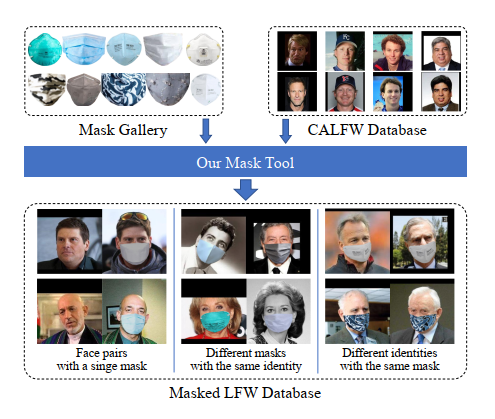

Criteria:
- Over 75% while testing in MLFW data
- Flexible Operation 

## BASIS THEORY

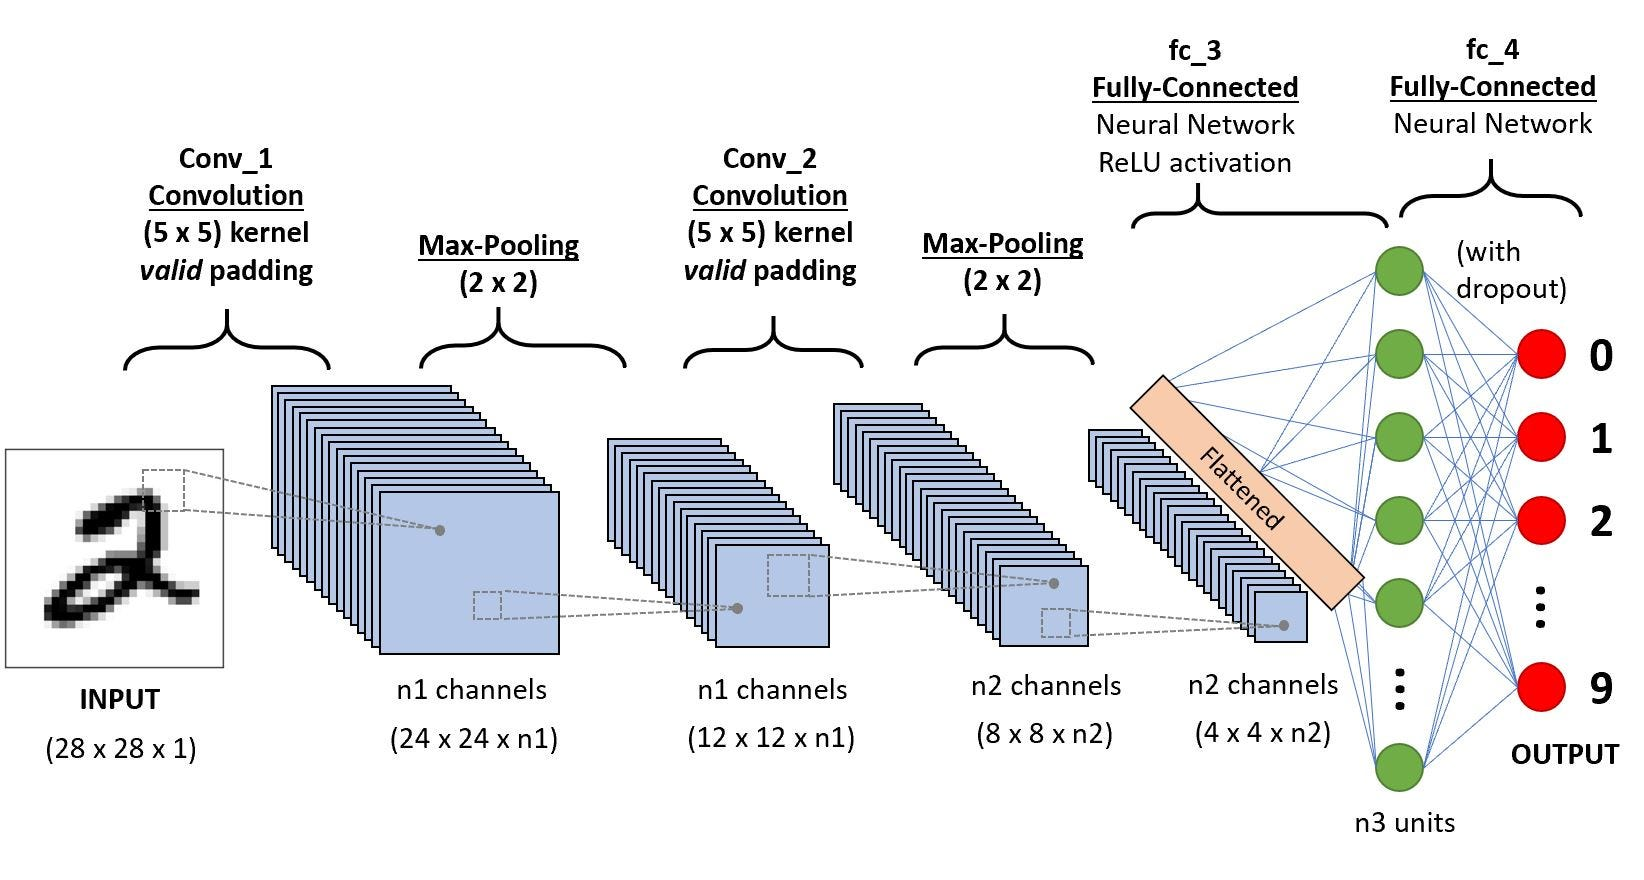

## DATABASE

For the 6,000 face pairs in CALFW database, we randomly
divide them into three subsets, which contain 3,000, 1,500
and 1,500 face pairs respectively according to different scenarios. The division reflects the hard examples in the real
world and increases the difficulty of face verification

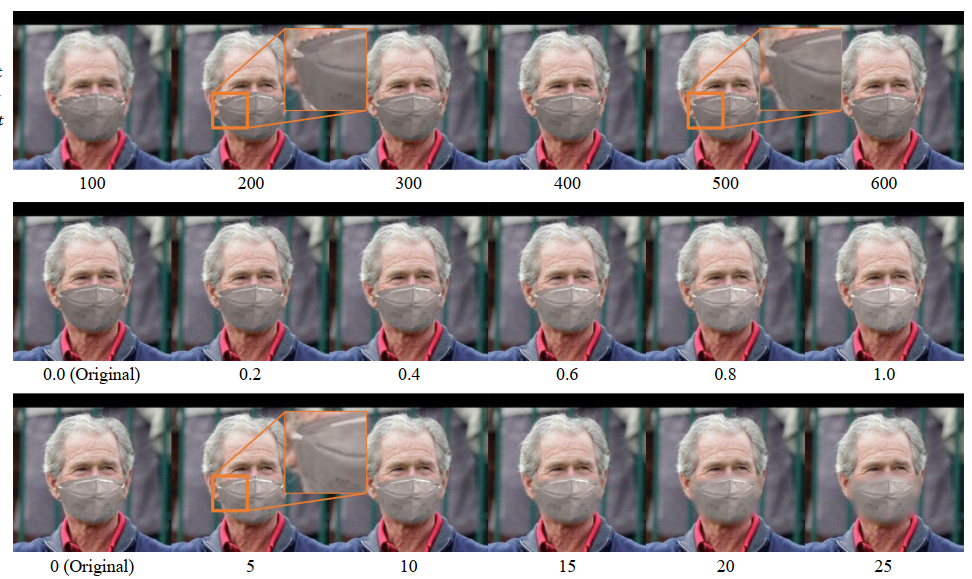

## APPROACH

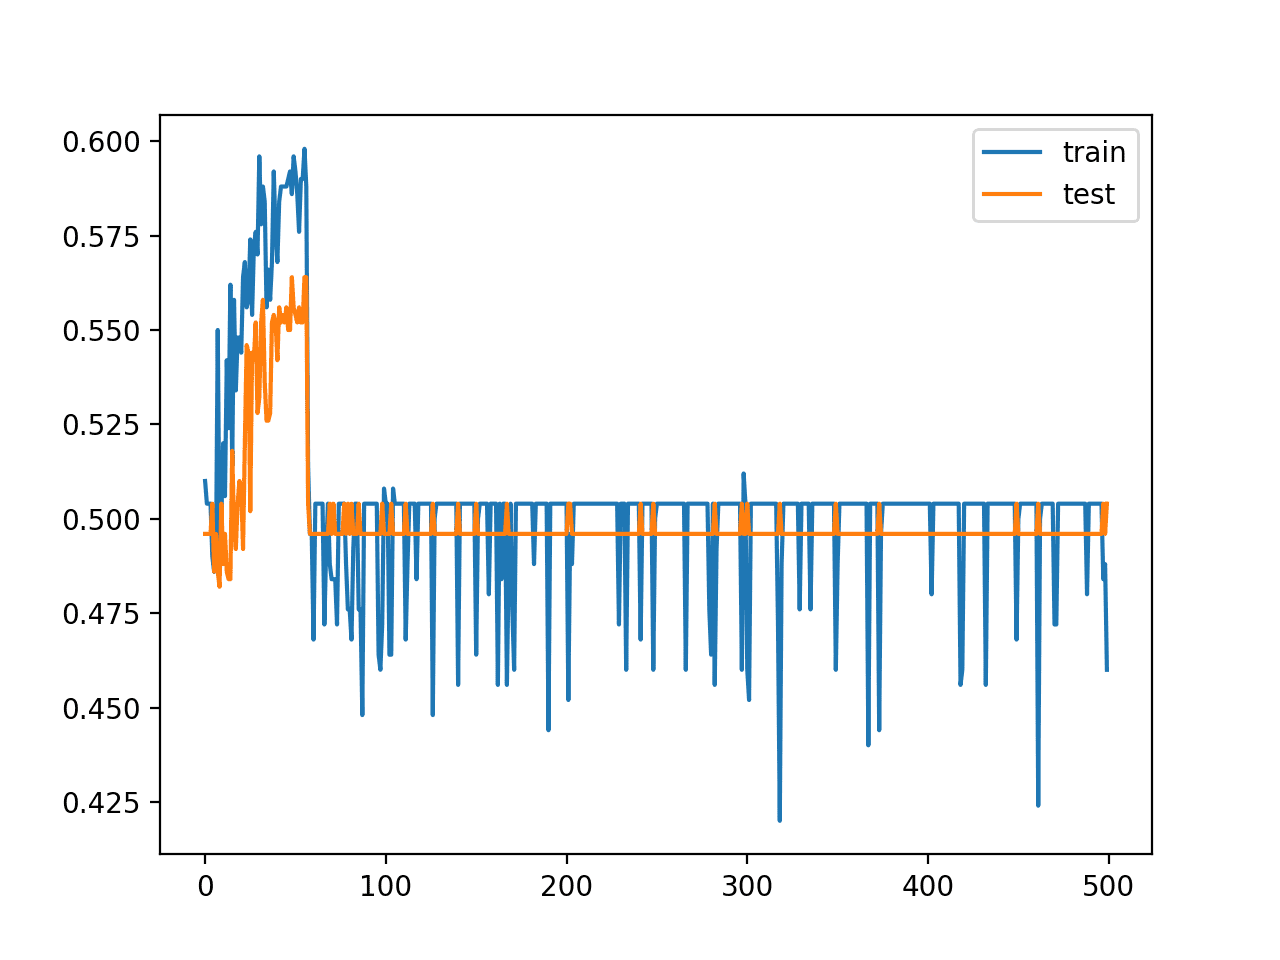

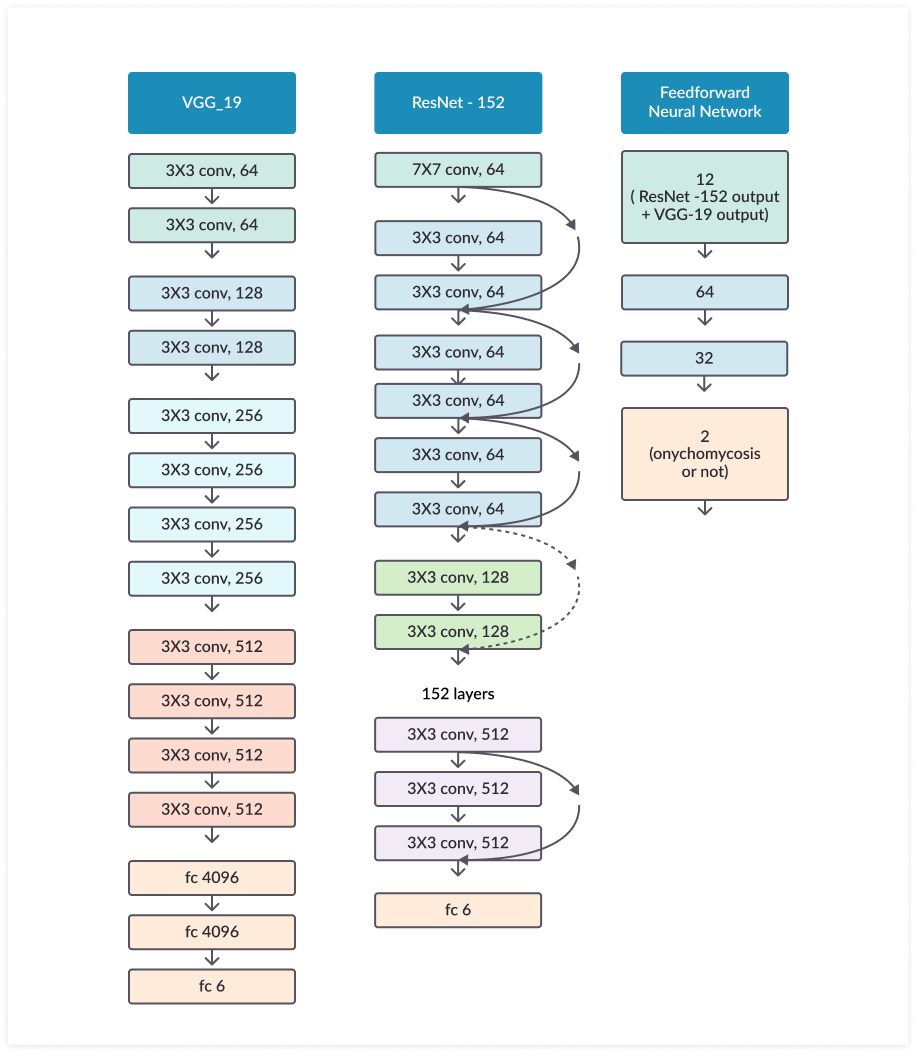

## EVALUATION AND TESTING

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: ./gui\models\buffalo_l\1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: ./gui\models\buffalo_l\2d106det.onnx landmark_2d_106
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./gui\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: ./gui\models\buffalo_l\genderage.onnx genderage
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: ./gui\models\buffalo_l\w600k_r50.onnx recognition
set det-size: (1920, 2560)


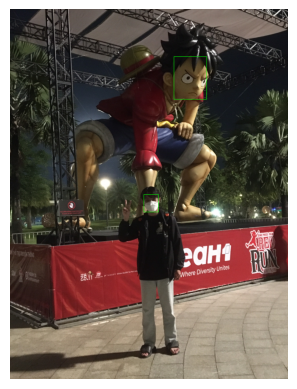

In [7]:
import cv2
import numpy as np
import FPTvision
import matplotlib.pyplot as plt

# Khởi tạo mô hình detection
app = FPTvision.app.FaceAnalysis(allowed_modules=['detection'])  # enable detection model only
app.prepare(ctx_id=0, det_size=(1920, 2560))  # Thay đổi kích thước det_size

# Đường dẫn tới bức ảnh
image_path = 'Masked.jpg'

# Đọc ảnh
image = cv2.imread(image_path)

# Sử dụng mô hình detection
faces = app.get(image)

# Xử lý kết quả detection
for face in faces:
    bbox = face.bbox.astype(int)
    cv2.rectangle(image, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 0), 2)

# Hiển thị ảnh với bounding boxes
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: ./gui\models\buffalo_l\1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: ./gui\models\buffalo_l\2d106det.onnx landmark_2d_106
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./gui\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: ./gui\models\buffalo_l\genderage.onnx genderage
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: ./gui\models\buffalo_l\w600k_r50.onnx recognition
set det-size: (640, 640)


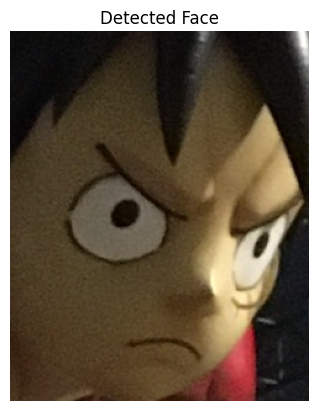

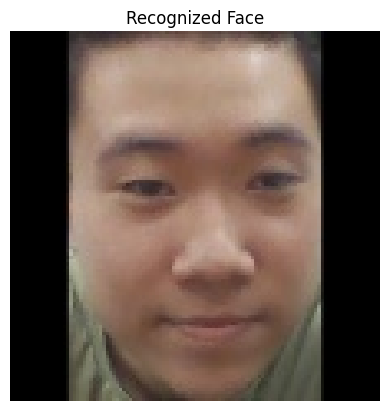

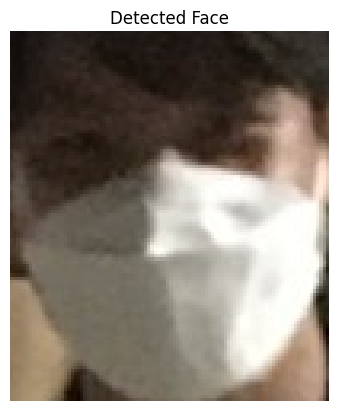

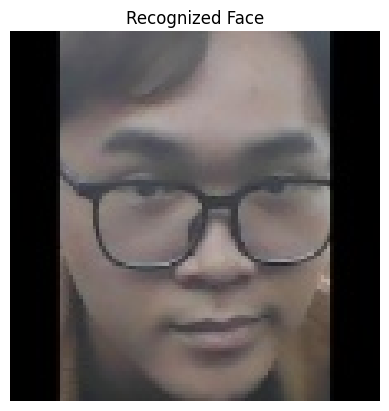

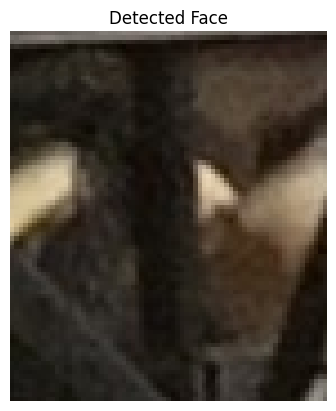

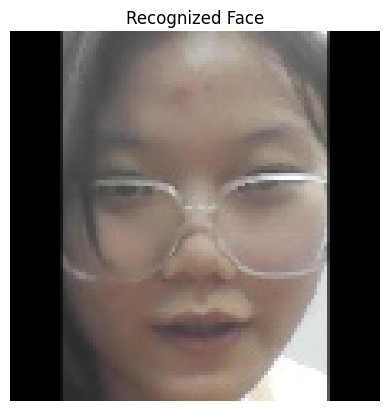

In [8]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

from FPTvision.model_zoo.arcface_onnx import ArcFaceONNX
from FPTvision.app import FaceAnalysis

# Khởi tạo mô hình phát hiện khuôn mặt
app = FaceAnalysis(allowed_modules=['detection'])  # enable detection model only
app.prepare(ctx_id=-1, det_size=(640, 640))  # Thay đổi kích thước det_size

# Khởi tạo lớp ArcFaceONNX
arcface = ArcFaceONNX(model_file='model.onnx')  # Thay đổi đường dẫn tới model_file của bạn

# Đường dẫn đến thư mục chứa các khuôn mặt đã aligned
aligned_faces_dir = 'aligned'

# Load danh sách các khuôn mặt đã aligned và trích xuất embedding
aligned_faces = []
aligned_embeddings = []
aligned_face_files = glob.glob(aligned_faces_dir + '/*.jpg')
for face_file in aligned_face_files:
    face_image = cv2.imread(face_file)
    aligned_faces.append(face_image)

aligned_embeddings = arcface.get_feat(aligned_faces)

# Đường dẫn tới bức ảnh
image_path = 'Masked.jpg'

# Đọc ảnh gốc từ file
image = cv2.imread(image_path)

# Phát hiện khuôn mặt trong ảnh gốc
faces = app.get(image)
if not faces:
    print("Không tìm thấy khuôn mặt trong ảnh gốc.")
    exit()

# Duyệt qua các khuôn mặt đã phát hiện và thực hiện recognition
for detected_face in faces:
    bbox = detected_face.bbox.astype(int)
    detected_face_img = image[bbox[1]:bbox[3], bbox[0]:bbox[2]]
    detected_embedding = arcface.get_feat([detected_face_img])
    max_similarity = 0
    recognized_face_idx = -1

    # So sánh với các khuôn mặt đã aligned để tìm khuôn mặt giống nhất
    for idx, aligned_embedding in enumerate(aligned_embeddings):
        similarity = arcface.compute_sim(aligned_embedding, detected_embedding)
        if similarity > max_similarity:
            max_similarity = similarity
            recognized_face_idx = idx

    if recognized_face_idx != -1:
        recognized_face = aligned_faces[recognized_face_idx]

        # Hiển thị ảnh khuôn mặt phát hiện được
        plt.imshow(cv2.cvtColor(detected_face_img, cv2.COLOR_BGR2RGB))
        plt.title('Detected Face')
        plt.axis('off')
        plt.show()

        # Hiển thị ảnh khuôn mặt được nhận dạng
        plt.imshow(cv2.cvtColor(recognized_face, cv2.COLOR_BGR2RGB))
        plt.title('Recognized Face')
        plt.axis('off')
        plt.show()
        
    else:
        print("Không nhận dạng được khuôn mặt.")